In [27]:
import pickle
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt



In [28]:
MODEL_PATH = Path("public/ml/model.pkl")  # path to your model
with open(MODEL_PATH, "rb") as f:
    model = pickle.load(f)
# import os
# os.getcwd()
# os.chdir(r"c:\Users\HP\OneDrive\coding\jupyter_notebook\gssoc\cpp-dsa-sheet-testing")


print("✅ Loaded trained model")


✅ Loaded trained model


In [ ]:
# (default values if user just presses Enter)
streak = int(input("Streak (consecutive days solved, default 0): ") or 0)
avg_daily_solved = float(input("Average problems/day recently (default 1.0): ") or 1.0)
weekly_active_days = int(input("Weekly active days (0-7, default 2): ") or 2)
current_progress = float(input("Current progress (%) default 10.0): ") or 10.0)
total_solved = float(input("Total solved problems historically (default 10): ") or 10)





In [36]:
# features in the same order used during training
import numpy as np
X_input = np.array([[streak, avg_daily_solved, weekly_active_days, current_progress, total_solved]])

# predict next 7 days
pred_7d = model.predict(X_input)[0]

# scale prediction for longer periods (rough estimation)
predictions = {
    "next_7_days": round(pred_7d, 2),
    "next_1_month": round(pred_7d * 4.3, 2),   # ~4.3 weeks in a month
    "next_2_month": round(pred_7d * 8.6, 2),   # ~8.3 weeks in a month
    "next_3_months": round(pred_7d * 4.3 * 3, 2),
    "next_6_months": round(pred_7d * 4.3 * 6, 2),
    "next_1_year": round(pred_7d * 4.3 * 12, 2)
}

print("your given data:\n")
print("streak:",streak)
print("avg_daily_solved:",avg_daily_solved)
print("weekly_active_days:",weekly_active_days)
print("current_progress:",current_progress)
print("total_solved:",total_solved)

print("\nPredicted number of questions:")
for k, v in predictions.items():
    print(f"  {k}: {v}")




your given data:

streak: 5
avg_daily_solved: 2.0
weekly_active_days: 6
current_progress: 10.0
total_solved: 50.0

Predicted number of questions:
  next_7_days: 18.26
  next_1_month: 78.51
  next_2_month: 157.02
  next_3_months: 235.53
  next_6_months: 471.07
  next_1_year: 942.14


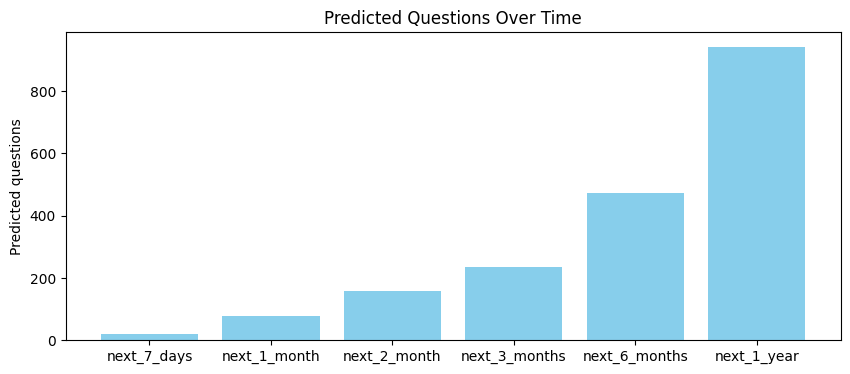

In [23]:
plt.figure(figsize=(10,4))
plt.bar(predictions.keys(), predictions.values(), color='skyblue')
plt.ylabel("Predicted questions")
plt.title("Predicted Questions Over Time")
plt.show()


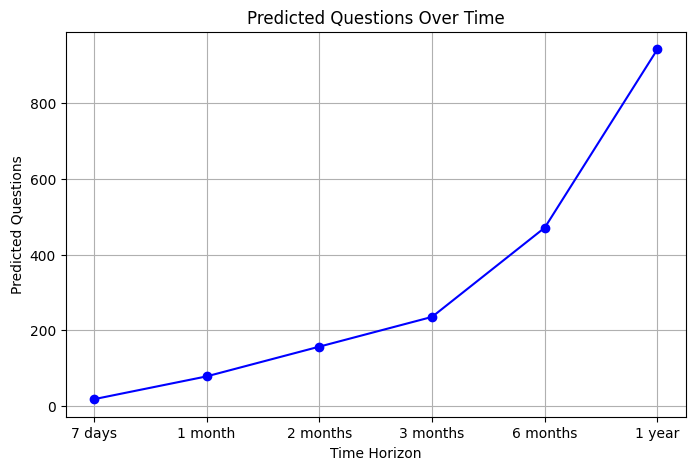

In [22]:
import matplotlib.pyplot as plt

# horizons and predicted values
horizons = ["7 days", "1 month","2 months", "3 months", "6 months", "1 year"]
pred_values = [predictions["next_7_days"], 
               predictions["next_1_month"], 
               predictions["next_2_month"], 
               predictions["next_3_months"], 
               predictions["next_6_months"], 
               predictions["next_1_year"]]

plt.figure(figsize=(8,5))
plt.plot(horizons, pred_values, marker='o', linestyle='-', color='blue')
plt.title("Predicted Questions Over Time")
plt.xlabel("Time Horizon")
plt.ylabel("Predicted Questions")
plt.grid(True)
plt.show()
